# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [10]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [56]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 608


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units ="imperial"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units={units}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']["lat"]
        city_lng = city_weather['coord']["lon"]
        city_max_temp = city_weather['main']["temp_max"]
        city_humidity = city_weather['main']["humidity"]
        city_clouds = city_weather['clouds']["all"]
        city_wind = city_weather['wind']["speed"]
        city_country = city_weather['sys']["country"]
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vao
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | ushuaia
Processing Record 4 of Set 1 | redding
Processing Record 5 of Set 1 | vaini
Processing Record 6 of Set 1 | airai
Processing Record 7 of Set 1 | hilo
Processing Record 8 of Set 1 | richards bay
Processing Record 9 of Set 1 | bairiki
Processing Record 10 of Set 1 | emerald
Processing Record 11 of Set 1 | constitucion
Processing Record 12 of Set 1 | bur gabo
City not found. Skipping...
Processing Record 13 of Set 1 | pisco
Processing Record 14 of Set 1 | belushya guba
City not found. Skipping...
Processing Record 15 of Set 1 | makakilo city
Processing Record 16 of Set 1 | yangambi
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | imeni stepana razina
Processing Record 19 of Set 1 | rjukan
Processing Record 20 of Set 1 | thompson
Processing Record 21 of Set 1 | bluff
Processing Record 22 of Set 1 

Processing Record 37 of Set 4 | urman
Processing Record 38 of Set 4 | tasiilaq
Processing Record 39 of Set 4 | khatanga
Processing Record 40 of Set 4 | gizo
Processing Record 41 of Set 4 | fukue
Processing Record 42 of Set 4 | clyde river
Processing Record 43 of Set 4 | hobyo
Processing Record 44 of Set 4 | bud
Processing Record 45 of Set 4 | kurinjippadi
Processing Record 46 of Set 4 | lompoc
Processing Record 47 of Set 4 | kashi
Processing Record 48 of Set 4 | komsomolskiy
Processing Record 49 of Set 4 | orangeburg
Processing Record 0 of Set 5 | maragogi
Processing Record 1 of Set 5 | jamestown
Processing Record 2 of Set 5 | georgetown
Processing Record 3 of Set 5 | vaitupu
City not found. Skipping...
Processing Record 4 of Set 5 | upata
Processing Record 5 of Set 5 | purranque
Processing Record 6 of Set 5 | mujiayingzi
Processing Record 7 of Set 5 | padang
Processing Record 8 of Set 5 | ancud
Processing Record 9 of Set 5 | coquimbo
Processing Record 10 of Set 5 | attawapiskat
City n

Processing Record 28 of Set 8 | bundaberg
Processing Record 29 of Set 8 | coihaique
Processing Record 30 of Set 8 | yeppoon
Processing Record 31 of Set 8 | karratha
Processing Record 32 of Set 8 | sao joao da barra
Processing Record 33 of Set 8 | vila franca do campo
Processing Record 34 of Set 8 | ermelo
Processing Record 35 of Set 8 | tezu
Processing Record 36 of Set 8 | williston
Processing Record 37 of Set 8 | berlevag
Processing Record 38 of Set 8 | cumaribo
City not found. Skipping...
Processing Record 39 of Set 8 | bang sai
Processing Record 40 of Set 8 | tromso
Processing Record 41 of Set 8 | sakakah
Processing Record 42 of Set 8 | kinston
Processing Record 43 of Set 8 | rochegda
Processing Record 44 of Set 8 | paracatu
Processing Record 45 of Set 8 | aksarka
Processing Record 46 of Set 8 | waingapu
Processing Record 47 of Set 8 | hofn
Processing Record 48 of Set 8 | yerbogachen
Processing Record 49 of Set 8 | mitsamiouli
Processing Record 0 of Set 9 | alofi
Processing Record 1

In [24]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df = city_data_df[["City","Lat","Lng","Max Temp","Humidity","Cloudiness","Wind Speed", "Date"]]

# Show Record Count
city_data_df.count()

City          564
Lat           564
Lng           564
Max Temp      564
Humidity      564
Cloudiness    564
Wind Speed    564
Date          564
dtype: int64

In [25]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,vao,-22.6667,167.4833,79.45,77,84,14.18,1675231586
1,avarua,-21.2078,-159.7750,78.85,83,100,14.97,1675230992
2,ushuaia,-54.8000,-68.3000,56.86,51,75,12.66,1675231526
3,redding,40.5865,-122.3917,41.92,61,0,1.99,1675231340
4,vaini,-21.2000,-175.2000,82.56,83,75,9.22,1675231589


In [26]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [27]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
0,vao,-22.6667,167.4833,79.45,77,84,14.18,1675231586
1,avarua,-21.2078,-159.7750,78.85,83,100,14.97,1675230992
2,ushuaia,-54.8000,-68.3000,56.86,51,75,12.66,1675231526
3,redding,40.5865,-122.3917,41.92,61,0,1.99,1675231340
4,vaini,-21.2000,-175.2000,82.56,83,75,9.22,1675231589


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

In [28]:
plt.scatter?

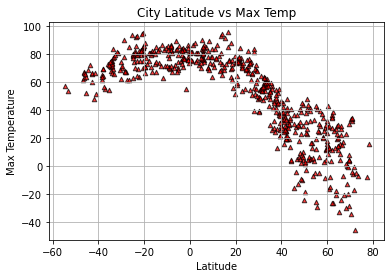

In [30]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'],city_data_df['Max Temp'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Max Temp')
plt.ylabel('Max Temperature')
plt.xlabel('Latitude')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

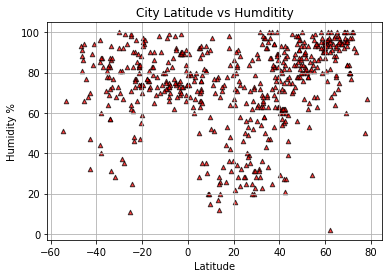

In [31]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'],city_data_df['Humidity'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Humditity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)

# Incorporate the other graph properties
# YOUR CODE HERE

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

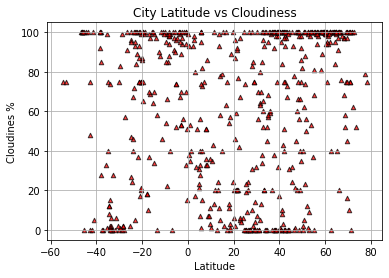

In [32]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'],city_data_df['Cloudiness'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Cloudiness')
plt.ylabel('Cloudines %')
plt.xlabel('Latitude')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

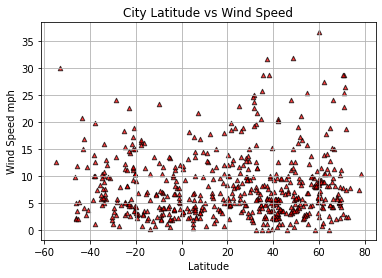

In [33]:
plt.scatter(city_data_df['Lat'],city_data_df['Wind Speed'], marker ='^', s=20, c='r', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title('City Latitude vs Wind Speed')
plt.ylabel('Wind Speed mph')
plt.xlabel('Latitude')
plt.grid(True)
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [50]:
# Define a function to create Linear Regression plots
x_values = city_data_df['']
y_values = city_data_df['']


(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)



# Add the linear regression equation and line to plot
fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="red")
plt.plot(x_values,regress_values,"r-")
plt.title(' vs Latitude',fontsize =20)
plt.xlabel('Latitude',fontsize =10)
plt.ylabel('',fontsize =10)


print(f"The r-squared is: {rvalue**2}")

SyntaxError: invalid syntax (2996043921.py, line 2)

In [51]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi = city_data_df[city_data_df["Lat"]>=0]
northern_hemi_df = pd.DataFrame(northern_hemi)

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
3,redding,40.5865,-122.3917,41.92,61,0,1.99,1675231340
6,hilo,19.7297,-155.0900,78.28,79,100,5.01,1675231294
8,bairiki,1.3292,172.9752,86.00,79,40,9.22,1675231031
12,makakilo city,21.3469,-158.0858,76.57,83,20,4.61,1675231495
13,yangambi,0.8102,24.4336,75.25,68,35,3.27,1675231599


In [52]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi = city_data_df[city_data_df["Lat"]<0]
southern_hemi_df = pd.DataFrame(southern_hemi)


# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
City_ID,,,,,,,,
0,vao,-22.6667,167.4833,79.45,77,84,14.18,1675231586
1,avarua,-21.2078,-159.7750,78.85,83,100,14.97,1675230992
2,ushuaia,-54.8000,-68.3000,56.86,51,75,12.66,1675231526
4,vaini,-21.2000,-175.2000,82.56,83,75,9.22,1675231589
5,airai,-8.9266,125.4092,69.24,85,85,2.73,1675231591


###  Temperature vs. Latitude Linear Regression Plot

y = -1.33x + 91.57
The r-squared is: 0.742776599887751


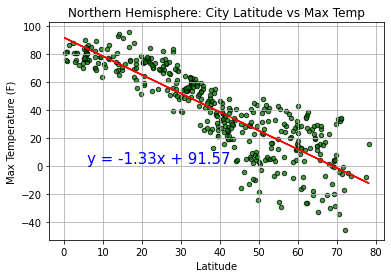

In [87]:
# Linear regression on Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Max Temp')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()


y = 0.34x + 81.73
The r-squared is: 0.24120662620220298


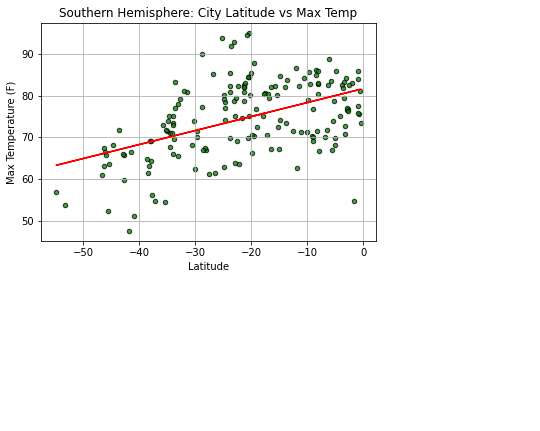

In [86]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Max Temp')
plt.ylabel('Max Temperature (F)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

y = 0.5x + 53.15
The r-squared is: 0.19519777510742223


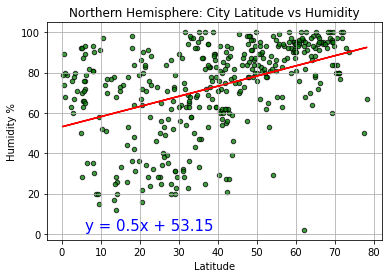

In [85]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()


y = 0.18x + 79.98
The r-squared is: 0.02257649448714718


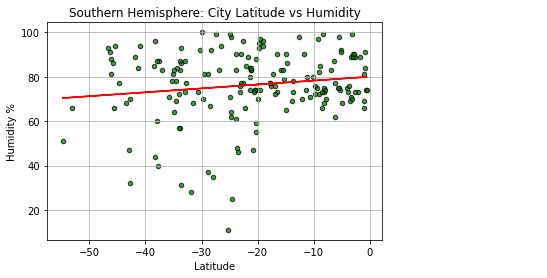

In [84]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

y = 0.73x + 32.4
The r-squared is: 0.13810337262442138


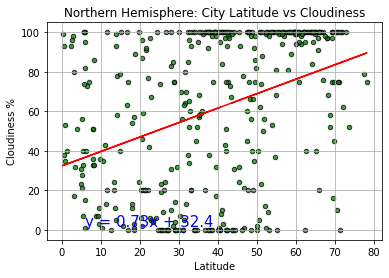

In [88]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()


y = 0.82x + 81.8
The r-squared is: 0.08443004279711037


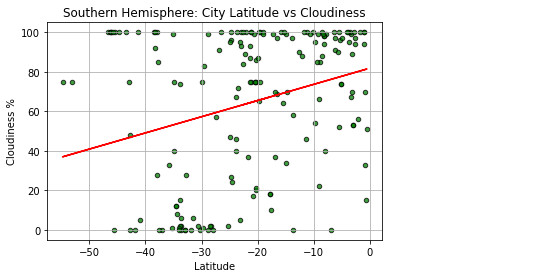

In [83]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

y = 0.02x + 7.42
The r-squared is: 0.0046485346435147954


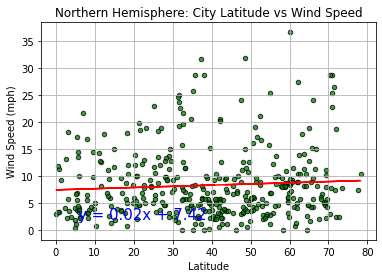

In [89]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Northern Hemisphere: City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()


y = -0.08x + 5.99
The r-squared is: 0.043076579502216834


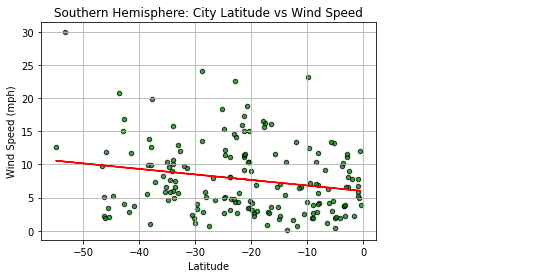

In [82]:
# Southern Hemisphere

x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept

equation_line= "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(equation_line)
print(f"The r-squared is: {rvalue**2}")

plt.scatter(x_values,y_values, marker ='o', s=20, c='green', edgecolors='black', alpha=0.75)
plt.title('Southern Hemisphere: City Latitude vs Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')
plt.grid(True)
plt.plot(x_values,regress_values,"r-")
plt.annotate(equation_line,(5.8,2), fontsize=15, color='b')
plt.show()


**Discussion about the linear relationship:** YOUR RESPONSE HERE